In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [5]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./Data/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [6]:
#data types
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [7]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [8]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [9]:
# Look at STATUS value counts 
application_df["STATUS"].value_counts()


1    34294
0        5
Name: STATUS, dtype: int64

In [11]:
# Look at SPECIAL CONSIDERATIONS value counts 
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [13]:
#drop the STATUS and SPECIAL CONSIDERATIONS
application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], 1)
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   APPLICATION_TYPE  34299 non-null  object
 1   AFFILIATION       34299 non-null  object
 2   CLASSIFICATION    34299 non-null  object
 3   USE_CASE          34299 non-null  object
 4   ORGANIZATION      34299 non-null  object
 5   INCOME_AMT        34299 non-null  object
 6   ASK_AMT           34299 non-null  int64 
 7   IS_SUCCESSFUL     34299 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 2.1+ MB


C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [14]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [16]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

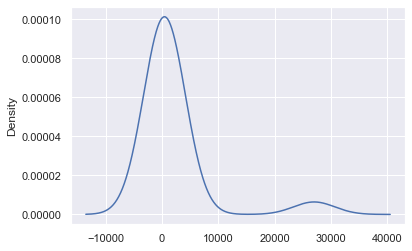

In [15]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [17]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

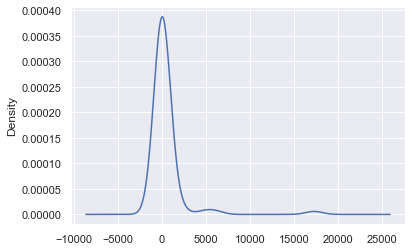

In [18]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [19]:
list(class_counts[class_counts < 1000].index)

['C7000',
 'C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [20]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [21]:
application_df.nunique()

APPLICATION_TYPE       9
AFFILIATION            6
CLASSIFICATION         6
USE_CASE               5
ORGANIZATION           4
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [22]:
application_df.dtypes

APPLICATION_TYPE    object
AFFILIATION         object
CLASSIFICATION      object
USE_CASE            object
ORGANIZATION        object
INCOME_AMT          object
ASK_AMT              int64
IS_SUCCESSFUL        int64
dtype: object

In [23]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT']

In [24]:
application_df[application_cat]

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT
0,T10,Independent,C1000,ProductDev,Association,0
1,T3,Independent,C2000,Preservation,Co-operative,1-9999
2,T5,CompanySponsored,C3000,ProductDev,Association,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999
4,T3,Independent,C1000,Heathcare,Trust,100000-499999
...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0
34297,T5,Independent,C3000,ProductDev,Association,0


In [25]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [27]:
application_df.shape

(34299, 41)

In [28]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ASK_AMT                       34299 non-null  int64  
 1   IS_SUCCESSFUL                 34299 non-null  int64  
 2   APPLICATION_TYPE_Other        34299 non-null  float64
 3   APPLICATION_TYPE_T10          34299 non-null  float64
 4   APPLICATION_TYPE_T19          34299 non-null  float64
 5   APPLICATION_TYPE_T3           34299 non-null  float64
 6   APPLICATION_TYPE_T4           34299 non-null  float64
 7   APPLICATION_TYPE_T5           34299 non-null  float64
 8   APPLICATION_TYPE_T6           34299 non-null  float64
 9   APPLICATION_TYPE_T7           34299 non-null  float64
 10  APPLICATION_TYPE_T8           34299 non-null  float64
 11  AFFILIATION_CompanySponsored  34299 non-null  float64
 12  AFFILIATION_Family/Parent     34299 non-null  float64
 13  A

In [29]:
# Split our preprocessed data into our features and target arrays
X = application_df.drop(["IS_SUCCESSFUL"], 1).values

y = application_df["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\jayce\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
len(X_train[0])

40

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3280      
                                                                 
 dense_1 (Dense)             (None, 50)                4050      
                                                                 
 dense_2 (Dense)             (None, 30)                1530      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8,891
Trainable params: 8,891
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("Checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [34]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Create a callback that saves the model's weights every epoch


cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [36]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:10 - loss: 0.6932 - accuracy: 0.5312
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6684 - accuracy: 0.6219  
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 21/804 [..............................] - ETA: 3s - loss: 0.6434 - accuracy: 0.6562
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.6293 - accuracy: 0.6629
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 45/804 [>.............................] - ETA: 3s - loss: 0.6217 - accuracy: 0.6715
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model t


Epoch 1: saving model to checkpoints\weights.01.hdf5
455/804 [===============>..............] - ETA: 1s - loss: 0.5731 - accuracy: 0.7196
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5731 - accuracy: 0.7197
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5735 - accuracy: 0.7196
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5737 - accuracy: 0.7194
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5732 - ac


Epoch 2: saving model to checkpoints\weights.02.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5502 - accuracy: 0.7362
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.5479 - accuracy: 0.7374
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7360
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
156/804 [====>.........................] - ETA: 2s - loss: 0.5518 - accuracy: 0.7328
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
171/804 [=====>.


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5515 - accuracy: 0.7340
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5519 - accuracy: 0.7332
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5525 - accuracy: 0.7326
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5520 - accuracy: 0.7328
Epoch 2: saving

277/804 [=========>....................] - ETA: 2s - loss: 0.5520 - accuracy: 0.7307
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7304
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.5517 - accuracy: 0.7307
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
322/804 [===========>..................] - ETA: 1s - loss: 0.5536 - accuracy: 0.7300
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
337/804 [=======


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5511 - accuracy: 0.7321
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5516 - accuracy: 0.7315
Epoch 4/100
  1/804 [..............................] - ETA: 1s - loss: 0.5505 - accuracy: 0.7188
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5314 - accuracy: 0.7465
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 33/804 [>.............................] - ETA: 2s - 

483/804 [=================>............] - ETA: 1s - loss: 0.5465 - accuracy: 0.7364
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5474 - accuracy: 0.7361
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.5481 - accuracy: 0.7350
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
533/804 [==================>...........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7350
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving


Epoch 5: saving model to checkpoints\weights.05.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7271
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5512 - accuracy: 0.7270
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5499 - accuracy: 0.7280
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5502 - accuracy: 0.7271
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving

682/804 [========================>.....] - ETA: 0s - loss: 0.5486 - accuracy: 0.7329
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5488 - accuracy: 0.7328
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5486 - accuracy: 0.7329
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5490 - accuracy: 0.7328
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
742/804 [=======

360/804 [============>.................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7340
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5463 - accuracy: 0.7348
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5461 - accuracy: 0.7346
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5462 - accuracy: 0.7343
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
420/804 [=======

 48/804 [>.............................] - ETA: 2s - loss: 0.5572 - accuracy: 0.7298
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 62/804 [=>............................] - ETA: 2s - loss: 0.5521 - accuracy: 0.7329
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 78/804 [=>............................] - ETA: 2s - loss: 0.5502 - accuracy: 0.7336
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5491 - accuracy: 0.7342
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
106/804 [==>....


Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
561/804 [===================>..........] - ETA: 0s - loss: 0.5478 - accuracy: 0.7339
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5483 - accuracy: 0.7332
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7330
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5478 - accuracy: 0.7336
Epoch 7: saving

259/804 [========>.....................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7373
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7393
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7415
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7411
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving

756/804 [===========================>..] - ETA: 0s - loss: 0.5458 - accuracy: 0.7353
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5454 - accuracy: 0.7356
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5459 - accuracy: 0.7350
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5460 - accuracy: 0.7347
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5463 - accuracy: 0.7346
Epoch 9/100
  1/804 [..............

435/804 [===============>..............] - ETA: 1s - loss: 0.5453 - accuracy: 0.7372
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5438 - accuracy: 0.7379
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5445 - accuracy: 0.7371
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5444 - accuracy: 0.7372
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
493/804 [=======


Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
134/804 [====>.........................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7418
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5362 - accuracy: 0.7410
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7420
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7412
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epo

619/804 [======================>.......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7376
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7378
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.5441 - accuracy: 0.7365
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5446 - accuracy: 0.7359
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
679/

313/804 [==========>...................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7371
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5454 - accuracy: 0.7359
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5447 - accuracy: 0.7364
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5443 - accuracy: 0.7361
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
370/

  1/804 [..............................] - ETA: 8s - loss: 0.5981 - accuracy: 0.7188
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5577 - accuracy: 0.7378
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 35/804 [>.............................] - ETA: 2s - loss: 0.5513 - accuracy: 0.7393
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7347
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epo


Epoch 12: saving model to checkpoints\weights.12.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7396
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7388
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.5416 - accuracy: 0.7388
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5422 - accuracy: 0.7380
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epo

189/804 [======>.......................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7399
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7402
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7388
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
232/804 [=======>......................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7388
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
247/


Epoch 13: saving model to checkpoints\weights.13.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5434 - accuracy: 0.7365
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5436 - accuracy: 0.7365
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5440 - accuracy: 0.7367
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.5434 - accuracy: 0.7366
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epo

370/804 [============>.................] - ETA: 1s - loss: 0.5438 - accuracy: 0.7361
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
383/804 [=============>................] - ETA: 1s - loss: 0.5444 - accuracy: 0.7355
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5445 - accuracy: 0.7354
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5453 - accuracy: 0.7347
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
429/


Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.5236 - accuracy: 0.7598
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5202 - accuracy: 0.7628
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5197 - accuracy: 0.7638
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5205 - accuracy: 0.7595
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epo

534/804 [==================>...........] - ETA: 0s - loss: 0.5415 - accuracy: 0.7386
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7388
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5415 - accuracy: 0.7388
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5414 - accuracy: 0.7388
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epo

220/804 [=======>......................] - ETA: 1s - loss: 0.5435 - accuracy: 0.7392
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
235/804 [=======>......................] - ETA: 1s - loss: 0.5434 - accuracy: 0.7399
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7396
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
265/804 [========>.....................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7400
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
280/

720/804 [=========================>....] - ETA: 0s - loss: 0.5417 - accuracy: 0.7379
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5426 - accuracy: 0.7375
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5422 - accuracy: 0.7380
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7373
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
780/

401/804 [=============>................] - ETA: 1s - loss: 0.5334 - accuracy: 0.7416
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7419
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.5337 - accuracy: 0.7424
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7412
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
464/

 92/804 [==>...........................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7517
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7491
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
122/804 [===>..........................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7500
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7502
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
154/


Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5428 - accuracy: 0.7361
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7359
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5432 - accuracy: 0.7357
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5425 - accuracy: 0.7365
Epo

273/804 [=========>....................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7412
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
288/804 [=========>....................] - ETA: 1s - loss: 0.5424 - accuracy: 0.7384
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5436 - accuracy: 0.7384
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7388
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
334/

768/804 [===========================>..] - ETA: 0s - loss: 0.5429 - accuracy: 0.7381
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5421 - accuracy: 0.7385
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5420 - accuracy: 0.7384
Epoch 19: saving model to checkpoints\weights.19.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5421 - accuracy: 0.7382
Epoch 20/100
  1/804 [..............................] - ETA: 2s - loss: 0.6092 - accuracy: 0.7812
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
 15/804 [...


Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5427 - accuracy: 0.7387
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5421 - accuracy: 0.7391
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7394
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7393
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5412 - accuracy: 0.7393
Epoch 20: saving model to che

123/804 [===>..........................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7365
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
137/804 [====>.........................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7386
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
152/804 [====>.........................] - ETA: 2s - loss: 0.5381 - accuracy: 0.7387
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7380
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
180/


Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5449 - accuracy: 0.7347
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5456 - accuracy: 0.7343
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.5458 - accuracy: 0.7340
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5455 - accuracy: 0.7340
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epo

301/804 [==========>...................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7382
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
317/804 [==========>...................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7396
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7391
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
346/804 [===========>..................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7398
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
361/


Epoch 22: saving model to checkpoints\weights.22.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5418 - accuracy: 0.7386
Epoch 23/100
  1/804 [..............................] - ETA: 2s - loss: 0.6851 - accuracy: 0.6875
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5609 - accuracy: 0.7353
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5540 - accuracy: 0.7279
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
 50/804 [>.............................] 


Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7398
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5398 - accuracy: 0.7393
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7396
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7394
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epo

173/804 [=====>........................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7417
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7402
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7386
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
218/804 [=======>......................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7372
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
233/

678/804 [========================>.....] - ETA: 0s - loss: 0.5414 - accuracy: 0.7385
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.5413 - accuracy: 0.7383
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5412 - accuracy: 0.7387
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7395
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epo

381/804 [=============>................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7411
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7409
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7410
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 0.5396 - accuracy: 0.7393
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epo


Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 0.5515 - accuracy: 0.7264
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7334
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.5486 - accuracy: 0.7293
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7326
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epo

564/804 [====================>.........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7407
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
580/804 [====================>.........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7400
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7399
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7396
Epoch 26: saving model to checkpoints\weights.26.hdf5

Epoch 26: saving model to checkpoints\weights.26.hdf5

Epo

251/804 [========>.....................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7408
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7398
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
281/804 [=========>....................] - ETA: 1s - loss: 0.5428 - accuracy: 0.7380
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7388
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
311/


Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5414 - accuracy: 0.7376
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7378
Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5

Epoch 27: saving model to checkpoints\weights.27.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5409 - accuracy: 0.7379
Epoch 28/100
  1/804 [..............................] - ETA: 1s - loss: 0.6948 - accuracy: 0.5938
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
 13/804 [..............................] 

452/804 [===============>..............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7400
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7398
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5384 - accuracy: 0.7396
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7396
Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5

Epoch 28: saving model to checkpoints\weights.28.hdf5
512/

145/804 [====>.........................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7478
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7443
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 0.5373 - accuracy: 0.7440
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
188/804 [======>.......................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7435
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
204/


Epoch 29: saving model to checkpoints\weights.29.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5413 - accuracy: 0.7379
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5414 - accuracy: 0.7374
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5405 - accuracy: 0.7380
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7384
Epoch 29: saving model to checkpoints\weights.29.hdf5

Epoch 29: saving model to checkpoints\weights.29.hdf5

Epo

329/804 [===========>..................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7412
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7406
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7395
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5358 - accuracy: 0.7390
Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5

Epoch 30: saving model to checkpoints\weights.30.hdf5
389/

 16/804 [..............................] - ETA: 2s - loss: 0.5118 - accuracy: 0.7461
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5334 - accuracy: 0.7302
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7312
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7359
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
 77/

510/804 [==================>...........] - ETA: 1s - loss: 0.5371 - accuracy: 0.7392
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
526/804 [==================>...........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7392
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
544/804 [===================>..........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7393
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5373 - accuracy: 0.7395
Epoch 31: saving model to checkpoints\weights.31.hdf5

Epoch 31: saving model to checkpoints\weights.31.hdf5

Epo

195/804 [======>.......................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7385
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7398
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
216/804 [=======>......................] - ETA: 2s - loss: 0.5418 - accuracy: 0.7389
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7385
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7374
Epoch 32: saving model to che


Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7396
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7388
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5392 - accuracy: 0.7391
Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5

Epoch 32: saving model to checkpoints\weights.32.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.5396 - accuracy: 0.7392
Epo


Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7453
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7442
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7430
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5

Epoch 33: saving model to checkpoints\weights.33.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7436
Epoch 33: saving model to checkpoints\weights.33.hdf5

Epo

 66/804 [=>............................] - ETA: 2s - loss: 0.5287 - accuracy: 0.7476
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 82/804 [==>...........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7470
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
 98/804 [==>...........................] - ETA: 2s - loss: 0.5346 - accuracy: 0.7459
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.5333 - accuracy: 0.7475
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epo


Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
573/804 [====================>.........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7405
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5367 - accuracy: 0.7404
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
605/804 [=====================>........] - ETA: 0s - loss: 0.5358 - accuracy: 0.7408
Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5

Epoch 34: saving model to checkpoints\weights.34.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5363 - accuracy: 0.7400
Epo


Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
260/804 [========>.....................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7416
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
274/804 [=========>....................] - ETA: 1s - loss: 0.5373 - accuracy: 0.7416
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7405
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7405
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epo

752/804 [===========================>..] - ETA: 0s - loss: 0.5395 - accuracy: 0.7394
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5394 - accuracy: 0.7396
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7390
Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5

Epoch 35: saving model to checkpoints\weights.35.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.5394 - accuracy: 0.7390
Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 3s 3ms/step - lo

435/804 [===============>..............] - ETA: 1s - loss: 0.5424 - accuracy: 0.7371
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5427 - accuracy: 0.7367
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5430 - accuracy: 0.7373
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5432 - accuracy: 0.7367
Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epoch 36: saving model to checkpoints\weights.36.hdf5

Epo

128/804 [===>..........................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7288
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5475 - accuracy: 0.7298
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7355
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7366
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epo

628/804 [======================>.......] - ETA: 0s - loss: 0.5394 - accuracy: 0.7384
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7380
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5395 - accuracy: 0.7381
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5404 - accuracy: 0.7375
Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5

Epoch 37: saving model to checkpoints\weights.37.hdf5
687/

296/804 [==========>...................] - ETA: 1s - loss: 0.5370 - accuracy: 0.7416
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7416
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5382 - accuracy: 0.7417
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7400
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5

Epo

792/804 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7397
Epoch 38: saving model to checkpoints\weights.38.hdf5

Epoch 38: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5387 - accuracy: 0.7399
Epoch 39/100
  1/804 [..............................] - ETA: 2s - loss: 0.6149 - accuracy: 0.7188
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5662 - accuracy: 0.7114
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5604 - accuracy: 0.7219
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: s

475/804 [================>.............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7428
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5351 - accuracy: 0.7426
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5360 - accuracy: 0.7422
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7421
Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5

Epoch 39: saving model to checkpoints\weights.39.hdf5
533/


Epoch 40: saving model to checkpoints\weights.40.hdf5
169/804 [=====>........................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7445
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
187/804 [=====>........................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7431
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
204/804 [======>.......................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7443
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
219/804 [=======>......................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7443
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epo


Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.5366 - accuracy: 0.7412
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7404
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5381 - accuracy: 0.7394
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5

Epoch 40: saving model to checkpoints\weights.40.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7401
Epoch 40: saving model to checkpoints\weights.40.hdf5

Epo

351/804 [============>.................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7429
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7432
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7421
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7422
Epoch 41: saving model to checkpoints\weights.41.hdf5

Epoch 41: saving model to checkpoints\weights.41.hdf5

Epo

 34/804 [>.............................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7500
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 51/804 [>.............................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7433
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 66/804 [=>............................] - ETA: 2s - loss: 0.5421 - accuracy: 0.7358
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
 83/804 [==>...........................] - ETA: 2s - loss: 0.5341 - accuracy: 0.7417
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epo

529/804 [==================>...........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7403
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
543/804 [===================>..........] - ETA: 0s - loss: 0.5404 - accuracy: 0.7405
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5407 - accuracy: 0.7404
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7408
Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5

Epoch 42: saving model to checkpoints\weights.42.hdf5
586/


Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7400
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7400
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5402 - accuracy: 0.7405
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.5401 - accuracy: 0.7413
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epo

692/804 [========================>.....] - ETA: 0s - loss: 0.5390 - accuracy: 0.7389
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7386
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5390 - accuracy: 0.7385
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5390 - accuracy: 0.7388
Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5

Epoch 43: saving model to checkpoints\weights.43.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 

375/804 [============>.................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7403
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7414
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7413
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5354 - accuracy: 0.7411
Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5

Epoch 44: saving model to checkpoints\weights.44.hdf5
434/


Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.5414 - accuracy: 0.7339
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 79/804 [=>............................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7362
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7374
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7403
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epo

557/804 [===================>..........] - ETA: 0s - loss: 0.5401 - accuracy: 0.7393
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
574/804 [====================>.........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7398
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7401
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5393 - accuracy: 0.7402
Epoch 45: saving model to checkpoints\weights.45.hdf5

Epoch 45: saving model to checkpoints\weights.45.hdf5

Epo


Epoch 46: saving model to checkpoints\weights.46.hdf5
252/804 [========>.....................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7386
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7390
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7401
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7389
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epo

746/804 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7403
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.5368 - accuracy: 0.7402
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7401
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5375 - accuracy: 0.7396
Epoch 46: saving model to checkpoints\weights.46.hdf5

Epoch 46: saving model to checkpoints\weights.46.hdf5
804/804 [==============================] - 3s 3ms/step - lo

431/804 [===============>..............] - ETA: 1s - loss: 0.5340 - accuracy: 0.7412
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.5345 - accuracy: 0.7417
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5346 - accuracy: 0.7417
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5343 - accuracy: 0.7419
Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5

Epoch 47: saving model to checkpoints\weights.47.hdf5
491/

125/804 [===>..........................] - ETA: 2s - loss: 0.5482 - accuracy: 0.7308
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7317
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7347
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7348
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epo

627/804 [======================>.......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7436
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7428
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7419
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5371 - accuracy: 0.7412
Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5

Epoch 48: saving model to checkpoints\weights.48.hdf5
688/

319/804 [==========>...................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7422
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7429
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
349/804 [============>.................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7433
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7442
Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5

Epoch 49: saving model to checkpoints\weights.49.hdf5
378/


Epoch 49: saving model to checkpoints\weights.49.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5376 - accuracy: 0.7407
Epoch 50/100
  1/804 [..............................] - ETA: 1s - loss: 0.4708 - accuracy: 0.8125
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7448
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5332 - accuracy: 0.7528
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
 49/804 [>.............................] 


Epoch 50: saving model to checkpoints\weights.50.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5388 - accuracy: 0.7411
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
510/804 [==================>...........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7411
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
524/804 [==================>...........] - ETA: 0s - loss: 0.5387 - accuracy: 0.7412
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5395 - accuracy: 0.7410
Epoch 50: saving model to checkpoints\weights.50.hdf5

Epoch 50: saving model to checkpoints\weights.50.hdf5

Epo


Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.5372 - accuracy: 0.7407
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7400
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
221/804 [=======>......................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7417
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5368 - accuracy: 0.7403
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epo


Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5373 - accuracy: 0.7408
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5374 - accuracy: 0.7409
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5379 - accuracy: 0.7406
Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5

Epoch 51: saving model to checkpoints\weights.51.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7405
Epo

376/804 [=============>................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7424
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7410
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5357 - accuracy: 0.7408
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7407
Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5

Epoch 52: saving model to checkpoints\weights.52.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 

 67/804 [=>............................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7491
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
 85/804 [==>...........................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7485
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7430
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7471
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epo

574/804 [====================>.........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7413
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
589/804 [====================>.........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7415
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7418
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5367 - accuracy: 0.7420
Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5

Epoch 53: saving model to checkpoints\weights.53.hdf5
632/


Epoch 54: saving model to checkpoints\weights.54.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7422
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7414
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7421
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7420
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epo

761/804 [===========================>..] - ETA: 0s - loss: 0.5373 - accuracy: 0.7408
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5369 - accuracy: 0.7412
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5373 - accuracy: 0.7405
Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5

Epoch 54: saving model to checkpoints\weights.54.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5370 - accuracy: 0.7407
Epoch 55/100
  1/804 [..............................] - ETA: 1s - loss: 0.6204 - accuracy: 0.7188
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: s


Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5365 - accuracy: 0.7390
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5365 - accuracy: 0.7389
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7383
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7380
Epoch 55: saving model to checkpoints\weights.55.hdf5

Epoch 55: saving model to checkpoints\weights.55.hdf5

Epo

128/804 [===>..........................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7371
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
144/804 [====>.........................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7370
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.5339 - accuracy: 0.7387
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7412
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epo

622/804 [======================>.......] - ETA: 0s - loss: 0.5355 - accuracy: 0.7415
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5353 - accuracy: 0.7416
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5350 - accuracy: 0.7414
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.5362 - accuracy: 0.7404
Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5

Epoch 56: saving model to checkpoints\weights.56.hdf5
681/

306/804 [==========>...................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7432
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
323/804 [===========>..................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7424
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7423
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7426
Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5

Epoch 57: saving model to checkpoints\weights.57.hdf5
369/

804/804 [==============================] - 3s 3ms/step - loss: 0.5365 - accuracy: 0.7405
Epoch 58/100
  1/804 [..............................] - ETA: 1s - loss: 0.4196 - accuracy: 0.8750
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5294 - accuracy: 0.7461
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5541 - accuracy: 0.7295
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
 48/804 [>.............................] - ETA: 2s - loss: 0.5556 - accuracy: 0.7233
Epoch 58: s


Epoch 58: saving model to checkpoints\weights.58.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5374 - accuracy: 0.7394
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
514/804 [==================>...........] - ETA: 0s - loss: 0.5376 - accuracy: 0.7395
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
532/804 [==================>...........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7405
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5

Epoch 58: saving model to checkpoints\weights.58.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7406
Epoch 58: saving model to checkpoints\weights.58.hdf5

Epo

179/804 [=====>........................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7470
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7451
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7453
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5354 - accuracy: 0.7453
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
239/

675/804 [========================>.....] - ETA: 0s - loss: 0.5357 - accuracy: 0.7416
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5367 - accuracy: 0.7407
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7415
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5364 - accuracy: 0.7414
Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5

Epoch 59: saving model to checkpoints\weights.59.hdf5
733/

363/804 [============>.................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7424
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
379/804 [=============>................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7419
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7419
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5
409/804 [==============>...............] - ETA: 1s - loss: 0.5332 - accuracy: 0.7416
Epoch 60: saving model to checkpoints\weights.60.hdf5

Epoch 60: saving model to checkpoints\weights.60.hdf5

Epo

 49/804 [>.............................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7385
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 65/804 [=>............................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7404
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 80/804 [=>............................] - ETA: 2s - loss: 0.5268 - accuracy: 0.7398
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.5288 - accuracy: 0.7405
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epo


Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.5386 - accuracy: 0.7357
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7361
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7358
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5

Epoch 61: saving model to checkpoints\weights.61.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5381 - accuracy: 0.7364
Epoch 61: saving model to checkpoints\weights.61.hdf5

Epo

215/804 [=======>......................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7436
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7431
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7450
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
261/804 [========>.....................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7441
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epo


Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5367 - accuracy: 0.7406
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5364 - accuracy: 0.7407
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5362 - accuracy: 0.7407
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5

Epoch 62: saving model to checkpoints\weights.62.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.5361 - accuracy: 0.7409
Epoch 62: saving model to checkpoints\weights.62.hdf5

Epo

398/804 [=============>................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7412
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5349 - accuracy: 0.7406
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7413
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.5340 - accuracy: 0.7419
Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5

Epoch 63: saving model to checkpoints\weights.63.hdf5
457/


Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5453 - accuracy: 0.7397
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5450 - accuracy: 0.7380
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7344
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5495 - accuracy: 0.7296
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epo

578/804 [====================>.........] - ETA: 0s - loss: 0.5371 - accuracy: 0.7397
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7402
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
608/804 [=====================>........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7404
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5358 - accuracy: 0.7406
Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5

Epoch 64: saving model to checkpoints\weights.64.hdf5
638/

264/804 [========>.....................] - ETA: 1s - loss: 0.5405 - accuracy: 0.7331
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7326
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5407 - accuracy: 0.7329
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.5408 - accuracy: 0.7330
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
328/

764/804 [===========================>..] - ETA: 0s - loss: 0.5351 - accuracy: 0.7408
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5364 - accuracy: 0.7400
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5363 - accuracy: 0.7401
Epoch 65: saving model to checkpoints\weights.65.hdf5

Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5363 - accuracy: 0.7401
Epoch 66/100
  1/804 [..............................] - ETA: 2s - loss: 0.4944 - accuracy: 0.7500
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: s


Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.5358 - accuracy: 0.7421
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5347 - accuracy: 0.7429
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
486/804 [=================>............] - ETA: 1s - loss: 0.5347 - accuracy: 0.7427
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5

Epoch 66: saving model to checkpoints\weights.66.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5351 - accuracy: 0.7426
Epoch 66: saving model to checkpoints\weights.66.hdf5

Epo


Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
131/804 [===>..........................] - ETA: 2s - loss: 0.5288 - accuracy: 0.7452
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
146/804 [====>.........................] - ETA: 2s - loss: 0.5290 - accuracy: 0.7451
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7442
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7436
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epo

629/804 [======================>.......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7407
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5352 - accuracy: 0.7407
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7410
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7413
Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5

Epoch 67: saving model to checkpoints\weights.67.hdf5
687/

308/804 [==========>...................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7429
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7437
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7426
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
356/804 [============>.................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7423
Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5

Epoch 68: saving model to checkpoints\weights.68.hdf5
371/

804/804 [==============================] - 3s 3ms/step - loss: 0.5363 - accuracy: 0.7410
Epoch 69/100
  1/804 [..............................] - ETA: 1s - loss: 0.4476 - accuracy: 0.8125
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5167 - accuracy: 0.7743
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 34/804 [>.............................] - ETA: 2s - loss: 0.5208 - accuracy: 0.7638
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5254 - accuracy: 0.7564
Epoch 69: s

496/804 [=================>............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7385
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5388 - accuracy: 0.7385
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5385 - accuracy: 0.7387
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5379 - accuracy: 0.7393
Epoch 69: saving model to checkpoints\weights.69.hdf5

Epoch 69: saving model to checkpoints\weights.69.hdf5

Epo

180/804 [=====>........................] - ETA: 2s - loss: 0.5267 - accuracy: 0.7458
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5275 - accuracy: 0.7456
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7423
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7408
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
239/

682/804 [========================>.....] - ETA: 0s - loss: 0.5341 - accuracy: 0.7414
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7412
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5342 - accuracy: 0.7414
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5350 - accuracy: 0.7407
Epoch 70: saving model to checkpoints\weights.70.hdf5

Epoch 70: saving model to checkpoints\weights.70.hdf5

Epo


Epoch 71: saving model to checkpoints\weights.71.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5356 - accuracy: 0.7396
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
394/804 [=============>................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7401
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.5351 - accuracy: 0.7403
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5

Epoch 71: saving model to checkpoints\weights.71.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5355 - accuracy: 0.7398
Epoch 71: saving model to checkpoints\weights.71.hdf5

Epo

 65/804 [=>............................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7514
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.5317 - accuracy: 0.7500
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7474
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7455
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epo

562/804 [===================>..........] - ETA: 0s - loss: 0.5390 - accuracy: 0.7382
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
576/804 [====================>.........] - ETA: 0s - loss: 0.5387 - accuracy: 0.7383
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
591/804 [=====================>........] - ETA: 0s - loss: 0.5384 - accuracy: 0.7385
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7392
Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5

Epoch 72: saving model to checkpoints\weights.72.hdf5
621/


Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
238/804 [=======>......................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7438
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7430
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5357 - accuracy: 0.7403
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5348 - accuracy: 0.7412
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epo

734/804 [==========================>...] - ETA: 0s - loss: 0.5354 - accuracy: 0.7405
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5353 - accuracy: 0.7402
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5351 - accuracy: 0.7403
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7402
Epoch 73: saving model to checkpoints\weights.73.hdf5

Epoch 73: saving model to checkpoints\weights.73.hdf5

Epo

423/804 [==============>...............] - ETA: 1s - loss: 0.5362 - accuracy: 0.7394
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7392
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.5357 - accuracy: 0.7404
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
469/804 [================>.............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7402
Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5

Epoch 74: saving model to checkpoints\weights.74.hdf5
485/

109/804 [===>..........................] - ETA: 2s - loss: 0.5446 - accuracy: 0.7377
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7383
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
142/804 [====>.........................] - ETA: 2s - loss: 0.5425 - accuracy: 0.7399
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7409
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo

606/804 [=====================>........] - ETA: 0s - loss: 0.5325 - accuracy: 0.7424
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5331 - accuracy: 0.7423
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.5339 - accuracy: 0.7413
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.5343 - accuracy: 0.7409
Epoch 75: saving model to checkpoints\weights.75.hdf5

Epoch 75: saving model to checkpoints\weights.75.hdf5

Epo

295/804 [==========>...................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7433
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5354 - accuracy: 0.7432
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7438
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7436
Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5

Epo


Epoch 76: saving model to checkpoints\weights.76.hdf5

Epoch 76: saving model to checkpoints\weights.76.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5357 - accuracy: 0.7412
Epoch 77/100

Epoch 77: saving model to checkpoints\weights.77.hdf5
  1/804 [..............................] - ETA: 7s - loss: 0.7407 - accuracy: 0.6250
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5191 - accuracy: 0.7500
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7409
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\we

482/804 [================>.............] - ETA: 1s - loss: 0.5360 - accuracy: 0.7376
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.5353 - accuracy: 0.7388
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
515/804 [==================>...........] - ETA: 0s - loss: 0.5362 - accuracy: 0.7386
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
527/804 [==================>...........] - ETA: 0s - loss: 0.5366 - accuracy: 0.7388
Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5

Epoch 77: saving model to checkpoints\weights.77.hdf5
542/


Epoch 78: saving model to checkpoints\weights.78.hdf5
177/804 [=====>........................] - ETA: 2s - loss: 0.5299 - accuracy: 0.7426
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7409
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
211/804 [======>.......................] - ETA: 1s - loss: 0.5333 - accuracy: 0.7411
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7406
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epo

662/804 [=======================>......] - ETA: 0s - loss: 0.5341 - accuracy: 0.7414
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7412
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7413
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5339 - accuracy: 0.7420
Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5

Epoch 78: saving model to checkpoints\weights.78.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 


Epoch 79: saving model to checkpoints\weights.79.hdf5
350/804 [============>.................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7404
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.5328 - accuracy: 0.7413
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5307 - accuracy: 0.7425
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5
396/804 [=============>................] - ETA: 1s - loss: 0.5327 - accuracy: 0.7416
Epoch 79: saving model to checkpoints\weights.79.hdf5

Epoch 79: saving model to checkpoints\weights.79.hdf5

Epo

 33/804 [>.............................] - ETA: 2s - loss: 0.5219 - accuracy: 0.7443
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 49/804 [>.............................] - ETA: 2s - loss: 0.5285 - accuracy: 0.7411
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 64/804 [=>............................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7427
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.5228 - accuracy: 0.7492
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epo

537/804 [===================>..........] - ETA: 0s - loss: 0.5302 - accuracy: 0.7442
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
551/804 [===================>..........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7439
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
568/804 [====================>.........] - ETA: 0s - loss: 0.5309 - accuracy: 0.7435
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7431
Epoch 80: saving model to checkpoints\weights.80.hdf5

Epoch 80: saving model to checkpoints\weights.80.hdf5

Epo

220/804 [=======>......................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7422
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5349 - accuracy: 0.7418
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7422
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
267/804 [========>.....................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7416
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
280/

715/804 [=========================>....] - ETA: 0s - loss: 0.5363 - accuracy: 0.7403
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5358 - accuracy: 0.7406
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5354 - accuracy: 0.7409
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5352 - accuracy: 0.7410
Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5

Epoch 81: saving model to checkpoints\weights.81.hdf5
777/

407/804 [==============>...............] - ETA: 1s - loss: 0.5359 - accuracy: 0.7407
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5357 - accuracy: 0.7410
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7418
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.5351 - accuracy: 0.7412
Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5

Epoch 82: saving model to checkpoints\weights.82.hdf5
467/

 93/804 [==>...........................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7366
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
110/804 [===>..........................] - ETA: 2s - loss: 0.5339 - accuracy: 0.7409
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
126/804 [===>..........................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7374
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5399 - accuracy: 0.7359
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
154/

590/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7420
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
604/804 [=====================>........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7423
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.5332 - accuracy: 0.7412
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5332 - accuracy: 0.7412
Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5

Epoch 83: saving model to checkpoints\weights.83.hdf5
647/


Epoch 84: saving model to checkpoints\weights.84.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7401
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7433
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7415
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
333/804 [===========>..................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7411
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epo

768/804 [===========================>..] - ETA: 0s - loss: 0.5352 - accuracy: 0.7407
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5353 - accuracy: 0.7406
Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5

Epoch 84: saving model to checkpoints\weights.84.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7411
Epoch 84: saving model to checkpoints\weights.84.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5349 - accuracy: 0.7412
Epoch 85/100
  1/804 [..............................] - ETA: 2s - loss: 0.4408 - accuracy: 0.8750
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
 16/804 [...


Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.5307 - accuracy: 0.7444
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5314 - accuracy: 0.7439
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5314 - accuracy: 0.7437
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5

Epoch 85: saving model to checkpoints\weights.85.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.5325 - accuracy: 0.7429
Epoch 85: saving model to checkpoints\weights.85.hdf5

Epo


Epoch 86: saving model to checkpoints\weights.86.hdf5
145/804 [====>.........................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7532
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.5180 - accuracy: 0.7523
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5238 - accuracy: 0.7463
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5253 - accuracy: 0.7451
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epo

635/804 [======================>.......] - ETA: 0s - loss: 0.5330 - accuracy: 0.7426
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.5328 - accuracy: 0.7425
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5333 - accuracy: 0.7422
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5335 - accuracy: 0.7421
Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5

Epoch 86: saving model to checkpoints\weights.86.hdf5
695/

323/804 [===========>..................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7396
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
336/804 [===========>..................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7376
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
351/804 [============>.................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7367
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
366/804 [============>.................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7368
Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5

Epoch 87: saving model to checkpoints\weights.87.hdf5
381/


Epoch 88: saving model to checkpoints\weights.88.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7261
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 32/804 [>.............................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7295
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 47/804 [>.............................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7360
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.5264 - accuracy: 0.7436
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epo

518/804 [==================>...........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7447
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
535/804 [==================>...........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7451
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7449
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
562/804 [===================>..........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7447
Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5

Epoch 88: saving model to checkpoints\weights.88.hdf5
577/

201/804 [======>.......................] - ETA: 2s - loss: 0.5308 - accuracy: 0.7447
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
218/804 [=======>......................] - ETA: 1s - loss: 0.5305 - accuracy: 0.7450
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
234/804 [=======>......................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7465
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
250/804 [========>.....................] - ETA: 1s - loss: 0.5288 - accuracy: 0.7467
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epo

698/804 [=========================>....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7424
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7421
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.5344 - accuracy: 0.7421
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.5343 - accuracy: 0.7423
Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5

Epoch 89: saving model to checkpoints\weights.89.hdf5
762/

374/804 [============>.................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7401
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
385/804 [=============>................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7409
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
399/804 [=============>................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7409
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7403
Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5

Epoch 90: saving model to checkpoints\weights.90.hdf5
429/804 [===============>..............] - ETA: 1s - loss: 


Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 63/804 [=>............................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7426
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7433
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7420
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7423
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epo

552/804 [===================>..........] - ETA: 0s - loss: 0.5375 - accuracy: 0.7393
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5374 - accuracy: 0.7394
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
581/804 [====================>.........] - ETA: 0s - loss: 0.5372 - accuracy: 0.7396
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
596/804 [=====================>........] - ETA: 0s - loss: 0.5363 - accuracy: 0.7400
Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5

Epoch 91: saving model to checkpoints\weights.91.hdf5
613/

233/804 [=======>......................] - ETA: 1s - loss: 0.5435 - accuracy: 0.7371
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
248/804 [========>.....................] - ETA: 1s - loss: 0.5437 - accuracy: 0.7358
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
262/804 [========>.....................] - ETA: 1s - loss: 0.5408 - accuracy: 0.7381
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7379
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
293/

731/804 [==========================>...] - ETA: 0s - loss: 0.5374 - accuracy: 0.7396
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7398
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5370 - accuracy: 0.7403
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5

Epoch 92: saving model to checkpoints\weights.92.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.7407
Epoch 92: saving model to checkpoints\weights.92.hdf5

Epo

441/804 [===============>..............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7428
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7432
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.5333 - accuracy: 0.7440
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5350 - accuracy: 0.7424
Epoch 93: saving model to checkpoints\weights.93.hdf5

Epoch 93: saving model to checkpoints\weights.93.hdf5

Epo


Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
143/804 [====>.........................] - ETA: 2s - loss: 0.5357 - accuracy: 0.7439
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7436
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7432
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7435
Epo

633/804 [======================>.......] - ETA: 0s - loss: 0.5378 - accuracy: 0.7390
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5377 - accuracy: 0.7388
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5368 - accuracy: 0.7394
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.5364 - accuracy: 0.7396
Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5

Epoch 94: saving model to checkpoints\weights.94.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7398
Epoch 94: saving model to che


Epoch 95: saving model to checkpoints\weights.95.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7384
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5383 - accuracy: 0.7388
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5391 - accuracy: 0.7385
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7395
Epoch 95: saving model to checkpoints\weights.95.hdf5

Epoch 95: saving model to checkpoints\weights.95.hdf5

Epo

 15/804 [..............................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7375
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 30/804 [>.............................] - ETA: 3s - loss: 0.5439 - accuracy: 0.7365
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7521
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 56/804 [=>............................] - ETA: 3s - loss: 0.5231 - accuracy: 0.7489
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 


Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.5318 - accuracy: 0.7407
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.5325 - accuracy: 0.7406
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
545/804 [===================>..........] - ETA: 0s - loss: 0.5329 - accuracy: 0.7405
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5

Epoch 96: saving model to checkpoints\weights.96.hdf5
560/804 [===================>..........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7410
Epoch 96: saving model to checkpoints\weights.96.hdf5

Epo

200/804 [======>.......................] - ETA: 2s - loss: 0.5235 - accuracy: 0.7458
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 0.5245 - accuracy: 0.7456
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
229/804 [=======>......................] - ETA: 1s - loss: 0.5251 - accuracy: 0.7459
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.5264 - accuracy: 0.7454
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
259/


Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5348 - accuracy: 0.7411
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7412
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5344 - accuracy: 0.7410
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5

Epoch 97: saving model to checkpoints\weights.97.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5341 - accuracy: 0.7415
Epoch 97: saving model to checkpoints\weights.97.hdf5

Epo

377/804 [=============>................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7399
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
392/804 [=============>................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7410
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7412
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 0.5306 - accuracy: 0.7424
Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5

Epoch 98: saving model to checkpoints\weights.98.hdf5
440/

 58/804 [=>............................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7446
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7441
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7443
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7431
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
119/

557/804 [===================>..........] - ETA: 0s - loss: 0.5340 - accuracy: 0.7425
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5348 - accuracy: 0.7414
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5347 - accuracy: 0.7410
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7403
Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5

Epoch 99: saving model to checkpoints\weights.99.hdf5
613/


Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7357
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
254/804 [========>.....................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7376
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5353 - accuracy: 0.7393
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5355 - accuracy: 0.7390
Epoch 100: saving model to checkpoin


Epoch 100: saving model to checkpoints\weights.100.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7419
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5339 - accuracy: 0.7414
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7417
Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5

Epoch 100: saving model to checkpoints\weights.100.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7419
Epoch 100: saving model to checkpoin

<AxesSubplot:>

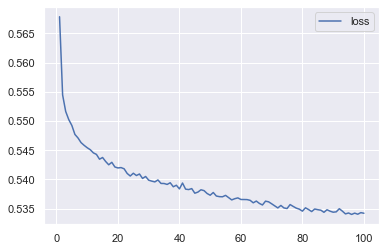

In [37]:
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

history_df.plot(y="loss")

<AxesSubplot:>

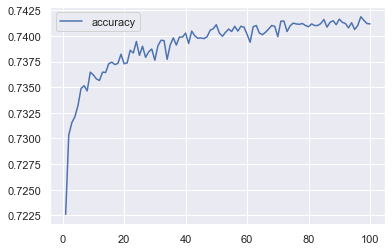

In [38]:
history_df.plot(y="accuracy")

In [39]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5596 - accuracy: 0.7263 - 302ms/epoch - 1ms/step
Loss: 0.5595594048500061, Accuracy: 0.7262973785400391


In [41]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization_Deliverable_3_1.h5")